# 1 - Perkenalan

* Nama       : Luvi Puspitasari
* Batch      : FTDS-012
* Dataset    : Telco Customer Churn
* Source Dataset  : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# 2 - Libraries

In [83]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# navigasi ke home folder

% cd /content/drive/MyDrive/

/content/drive/MyDrive


In [85]:
# cek folder yang ada ditempat sekarang

! ls

 bq-results-20220526-090337-1653555845278
 bq-results-20220528-095929-1653732230815
 bq-results-20220604-124219-1654346568501
'Colab Notebooks'
 Collage
 downloadMandiri1574154020801.jpg
 _DSC0643.JPG
'kuitansi urban signature.pdf'
'Luvi Puspitasari.jpg'
'Perhitungan metpelfix luki_rev 1.xlsx'
'Recording List FTDS-011 - Phase 1.xlsx'
'score toefl1.png'
 Screenshot_20191119-155718_WhatsApp.jpg
 tf_serving
'Tugas Akhir LJ D4'


In [86]:
# masuk ke tf serving

% cd tf_serving

/content/drive/MyDrive/tf_serving


In [87]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , classification_report

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
from tensorflow.keras.models import Sequential
from keras.layers import Dense



# 3 - Loading Dataset

In [88]:
# Load Dataset

dataset = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataset.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


there are have 21 rows and 7043 columns

In [89]:
# Duplicate Dataset

data = dataset.copy()

In [90]:
# Rename Columns

data.rename(columns={'Churn':'CustomerChurn'}, inplace=True)


#### Dataset Overview

In [91]:
# Overview of Dataset

data.info()
print('-'*50, '\n')
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 4 - Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

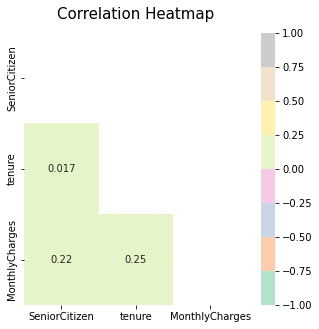

In [92]:
# Check Korelasi antara Potability (kolom target) dengan semua Features
plt.subplots(figsize=(5,5))
mask = np.triu(np.ones_like(data.corr()))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Pastel2')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=14)

The dataset only have 2 Numerical data, SeniorCitizen and tenure who have correlation above 0.

In [93]:
# total CustomerChurn

data.CustomerChurn.value_counts()

No     5174
Yes    1869
Name: CustomerChurn, dtype: int64

CustomerChurn have unique values "Yes" in amount 5174 and "No" in amount 1869

In [94]:
data_df = data.groupby(by=["InternetService", "gender"]).MonthlyCharges.agg(["sum"]).reset_index()
data_df

,InternetService,gender,sum
0,DSL,Female,69605.80
1,DSL,Male,71059.55
2,Fiber optic,Female,142056.90
3,Fiber optic,Male,141227.50
4,No,Female,15769.70
5,No,Male,16397.15


- Telco have 3 InternetService
  1. DSL
  2. Fiber Optic
  3. No
- The customers are divided into 2 male and female

- So, we can see the Female customer using Fiber Optic have highest bill, there is $ 142.056,9 a month.

# 5 - Data Preprocessing

Data preprocessing 

In [95]:
# Blank Data
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [96]:
# Handling blank data
data.TotalCharges.replace(' ', 0, inplace=True)
data.TotalCharges=pd.to_numeric(data.TotalCharges)

In [97]:
# New Data Info after handling blank column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
data = data.drop('customerID', axis = 1)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerChurn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Splitting Dataset

In [99]:
# Split data into trial and target
trial = data.drop('CustomerChurn', axis = 1)

# target
target = data['CustomerChurn']

In [100]:
# Split into train, test, and validation
X_train_full, X_test,  y_train_full, y_test = train_test_split(trial,
                                                               target,
                                                               shuffle=True, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)
print("Training data shape: {}".format(X_train.shape))
print("Validation data shape: {}".format(X_val.shape))
print("Testing data shape: {}".format(X_test.shape))

Training data shape: (4507, 19)
Validation data shape: (1127, 19)
Testing data shape: (1409, 19)


#### Missing Values


In [101]:
data.isnull().sum().any()

False

> We have no missing values in this dataset

#### Handling Outliers

> we no handling outliers because the dataet majority categorical data


In [102]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


> Data split into Numerical and Categorical data

In [103]:
# Split Train-Set and Test-Set based on Column Type

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]
X_val_num = X_val[num_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]
X_val_cat = X_val[cat_columns]


> X_train, X_test, X_val separate between Categorical and Numerical Columns



In [104]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_val_num_scaled = scaler.transform(X_val_num)


X_train_num_scaled

array([[0.        , 0.91666667, 0.55776892, 0.55951202],
       [0.        , 1.        , 0.91982072, 0.91679716],
       [0.        , 0.02777778, 0.72211155, 0.02012136],
       ...,
       [0.        , 0.01388889, 0.02141434, 0.00234893],
       [0.        , 0.26388889, 0.26643426, 0.09969717],
       [0.        , 0.01388889, 0.51195219, 0.00801976]])

> Scaling Using MinMaxScaler because data adjusts data within a certain range (range of minimum values ​​to maximum values),

In [105]:
# Feature Encoding Using One Hot Encoder

encoder = OneHotEncoder()
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
X_val_cat_encoded = encoder.transform(X_val_cat).toarray()


X_train_cat_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

> for X_train, X_test, X_val encoded from Categorical into Numerical data. So cumputer could read the code

In [106]:
# Feature Encoding using Label Encoder

encoder = LabelEncoder()
encoder.fit(y_train)

y_train_encoded = encoder.transform(y_train)
y_val_encoded = encoder.transform(y_val)
y_test_encoded = encoder.transform(y_test)

y_train_encoded

array([0, 0, 0, ..., 0, 0, 1])

> for y_train, y_test, y_val using Label encoder, because the target or binary class (yes and no)

#### Concate between Numerical Columns and Categorical Columns


In [107]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_val_final = np.concatenate([X_val_num_scaled, X_val_cat_encoded], axis=1)


> Combine the Numerical data after scaling and categorical data after encode 

#### Input Pipeline

In [108]:
AUTOTUNE = tf.data.AUTOTUNE

In [109]:
def preprocessing(data, label):
  mean = tf.reduce_mean(data, axis = 0)
  std = tf.math.reduce_std(data, axis=0)

  preprocessed_data = (data - mean)/ std
  return preprocessed_data, label

In [110]:
def get_batches(X_train_final, y_train, shuffle_buffer_size, batch_size, shuffle=False):
  data_ds = tf.data.Dataset.from_tensor_slices((X_train_final, y_train))
  preprocessed_data = data_ds.map(preprocessing)

  if shuffle:
    shuffled_data = preprocessed_data.shuffle(shuffle_buffer_size)
    data_batches = shuffled_data.batch(batch_size).cache().prefetch(AUTOTUNE)
  else:
    data_batches = preprocessed_data.batch(batch_size).cache().prefetch(AUTOTUNE)
  
  return data_batches

In [111]:
training_batches = get_batches(X_train_final, y_train_encoded, 1024, 64, shuffle=True)
validation_batches = get_batches(X_val_final, y_val_encoded, 256, 64, shuffle=False)
testing_batches = get_batches(X_test_final, y_test_encoded, 256, 64, shuffle=False)

ref : https://www.kaggle.com/code/sardiirfansyah/tensorflow-input-pipeline-prefetch-tf-data

# 6 - Model Definition

In [112]:
# Model
#Initiate ANN Classifier
model= Sequential()

#Adding Hidden Layer1
model.add(Dense(12,activation='relu',kernel_initializer='he_normal',input_dim=45))
#Adding Hidden Layer2
model.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
#Adding output Layer
model.add(Dense(1,activation='sigmoid',kernel_initializer='he_normal'))
#Compile them Model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

we use relu and sigmoid to get good value for non linear

> - sequential = This class helps in creating a cluster where a cluster is formed with layers of information or data that flows with top to bottom approach having a lot of layers (ref : https://www.educba.com/keras-sequential/)
> - relu = ReLU greatly speeds up the convergence process performed with stochastic gradient descent when compared to sigmoid / tanh (ref :https://medium.com/@pramestihattak/menilik-activation-functions-7710177a54c9)
> - sigmoid = sigmoid is used to obtain nonlinear output
> - adam = Good on convergence Speed and Quality, and abkle in adaptive Learning rate

# 7 - Model Training

Let's seek to classify

In [113]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                552       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 665
Trainable params: 665
Non-trainable params: 0
_________________________________________________________________


In [114]:
%time 
history = model.fit(X_train_final,y_train_encoded,batch_size= 10,epochs=100, validation_data = (X_val_final, y_val_encoded))


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 8.82 µs
Epoch 1/100
451/451 [==============================] - 3s 5ms/step - loss: 0.5019 - accuracy: 0.7641 - val_loss: 0.4540 - val_accuracy: 0.7799
Epoch 2/100
451/451 [==============================] - 2s 4ms/step - loss: 0.4311 - accuracy: 0.7970 - val_loss: 0.4508 - val_accuracy: 0.7933
Epoch 3/100
451/451 [==============================] - 2s 4ms/step - loss: 0.4239 - accuracy: 0.7983 - val_loss: 0.4404 - val_accuracy: 0.8012
Epoch 4/100
451/451 [==============================] - 2s 3ms/step - loss: 0.4208 - accuracy: 0.8003 - val_loss: 0.4439 - val_accuracy: 0.8039
Epoch 5/100
451/451 [==============================] - 1s 2ms/step - loss: 0.4188 - accuracy: 0.8001 - val_loss: 0.4403 - val_accuracy: 0.8030
Epoch 6/100
451/451 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.8028 - val_loss: 0.4451 - val_accuracy: 0.8012
Epoch 7/100
451/451 [==============================] - 1s 2ms/step - loss: 0.4

# 8 - Model Evaluation

In [115]:
#Get Prediction Proba
y_pred_ann_proba= model.predict(X_test_final)

In [116]:
#Convert Prediction to Int
y_pred_ann= (y_pred_ann_proba>.5).astype('int')

In [117]:
#Print Classification Report
print(classification_report(y_test_encoded,y_pred_ann))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1040
           1       0.66      0.47      0.55       369

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [118]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                552       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 665
Trainable params: 665
Non-trainable params: 0
_________________________________________________________________


In [119]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.501889,0.764145,0.453981,0.779947
1,0.431089,0.796982,0.450830,0.793256
2,0.423933,0.798314,0.440407,0.801242
3,0.420752,0.800311,0.443858,0.803904
4,0.418839,0.800089,0.440308,0.803017


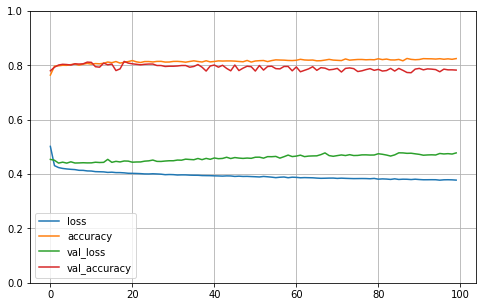

In [120]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

The Accuracy and val_accuracy look good because it has a short distance, so it can be the base fit

# 9 - Model Saving 

In [121]:
model.save("CustomerChurn")

INFO:tensorflow:Assets written to: CustomerChurn/assets


> model saving for trial the backend and frontend

In [122]:
X_train_final[:5]

array([[0.        , 0.91666667, 0.55776892, 0.55951202, 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.91982072, 0.91679716, 0.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0. 

> we show 5 samples to see what kind the X_train_final

In [123]:
# freeze model
# for layer in model.layers:
# layer.tainable = False

model.trainable = False

>freeze layers for frontend, but if we running at local server, we could unactivated freeze model

In [124]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                552       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 665
Trainable params: 0
Non-trainable params: 665
_________________________________________________________________


> The result of freeze models, Trainable params to be 0 and Non-trainable params : 665

# 10 - Model Inference

Let's check our models at test-set

In [125]:
model.evaluate(X_test_final, y_test_encoded)

45/45 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.7977


[0.4324277937412262, 0.7977288961410522]

Model Inference get accuracy 0.79

- Let's set X_val_final to be backend 
- Take 2 samples for backend

In [127]:
X_val_final.tolist()

[[0.0,
  0.2361111111111111,
  0.26245019920318724,
  0.07845891672807664,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0],
 [0.0,
  0.041666666666666664,
  0.2709163346613546,
  0.016315862196020634,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0],
 [0.0,
  0.6666666666666666,
  0.769422310756972,
  0.5328677689756818,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.